<a href="https://colab.research.google.com/github/jcmachicao/pucp_energy__erasmus_modulos/blob/main/pucp_energia__erasmus_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis del circuito de filtros
Este circuito muestra dos tipos de filtros que actúan sobre una señal de entrada compuesta por armónicos de 60 Hz.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter, freqz

In [ ]:
# Parámetros generales
fs = 1000  # Frecuencia de muestreo (Hz)
t = np.arange(0, 0.1, 1/fs)  # Vector de tiempo de 0 a 0.1 segundos
f_fundamental = 60  # Frecuencia fundamental (Hz)

# Generación de onda cuadrada
onda_cuadrada = np.sign(np.sin(2 * np.pi * f_fundamental * t))

In [ ]:
# Función para aplicar un filtro pasa-bajos
def filtro_pasa_bajos(data, cutoff, fs, order=1):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = lfilter(b, a, data)
    return y

# Función para aplicar un filtro notch (LC)
def filtro_notch(data, notch_freq, fs, quality_factor=30):
    nyquist = 0.5 * fs
    w0 = notch_freq / nyquist  # Frecuencia de notch normalizada
    b, a = butter(2, [w0 - 0.01, w0 + 0.01], btype='bandstop')
    y = lfilter(b, a, data)
    return y

In [ ]:
# Aplicar filtro pasa-bajos
cutoff_freq = 60  # Frecuencia de corte para el filtro pasa-bajos
salida_pasa_bajos = filtro_pasa_bajos(onda_cuadrada, cutoff_freq, fs)

# Aplicar filtro notch
notch_freq = 180  # Frecuencia del tercer armónico a eliminar
salida_notch = filtro_notch(salida_pasa_bajos, notch_freq, fs)

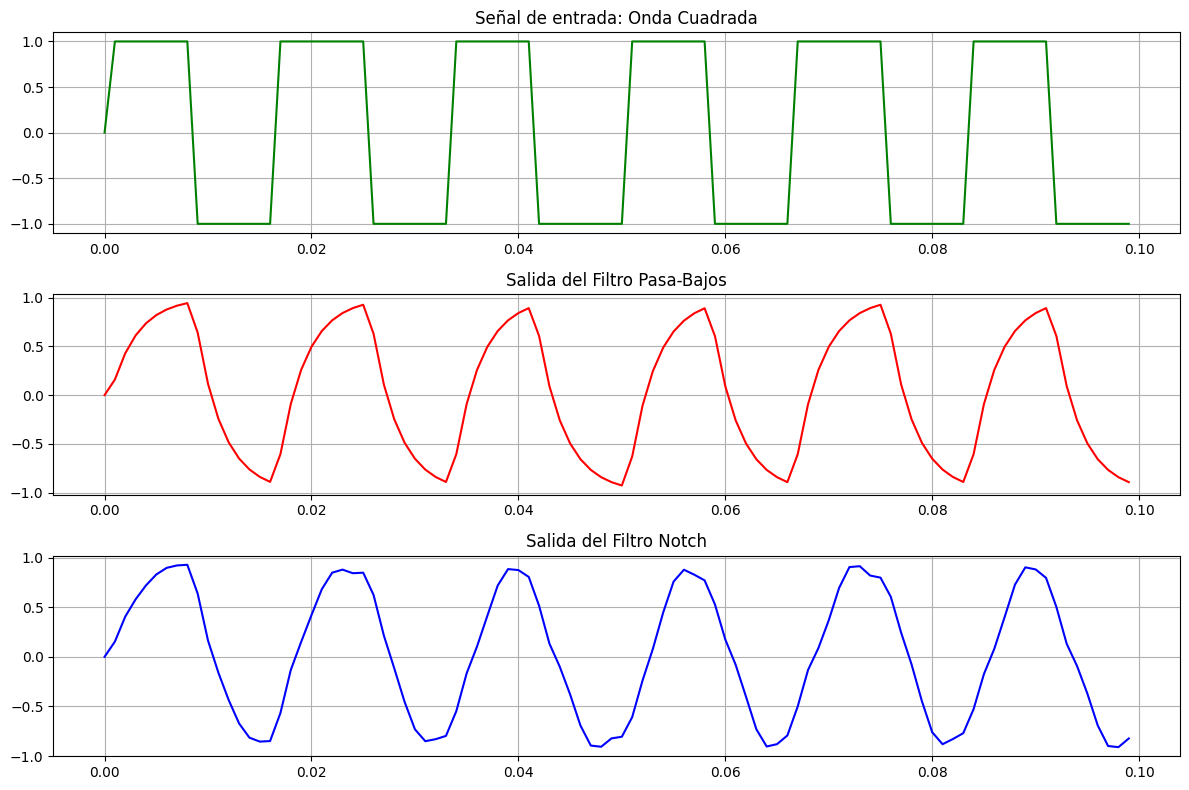

In [ ]:
# Gráficas en el dominio del tiempo
plt.figure(figsize=(12, 8))
plt.subplot(3, 1, 1)
plt.plot(t, onda_cuadrada, label='Onda Cuadrada (Entrada)', color='green')
plt.title('Señal de entrada: Onda Cuadrada')
plt.grid()

plt.subplot(3, 1, 2)
plt.plot(t, salida_pasa_bajos, label='Salida del Filtro Pasa-Bajos (60 Hz)', color='red')
plt.title('Salida del Filtro Pasa-Bajos')
plt.grid()

plt.subplot(3, 1, 3)
plt.plot(t, salida_notch, label='Salida del Filtro Notch (180 Hz)', color='blue')
plt.title('Salida del Filtro Notch')
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
# Análisis del espectro de frecuencia
frecuencia = np.fft.fftfreq(len(t), 1/fs)
espectro_onda_cuadrada = np.abs(np.fft.fft(onda_cuadrada))
espectro_pasa_bajos = np.abs(np.fft.fft(salida_pasa_bajos))
espectro_notch = np.abs(np.fft.fft(salida_notch))

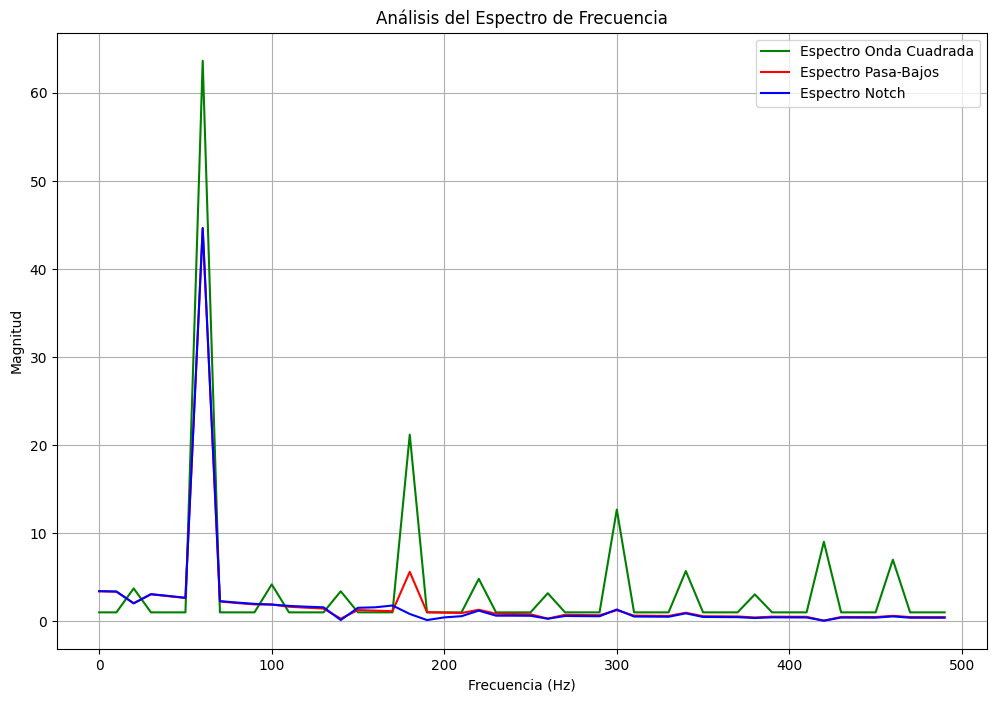

In [ ]:
# Gráfica del espectro de frecuencia
plt.figure(figsize=(12, 8))
plt.plot(frecuencia[:len(frecuencia)//2], espectro_onda_cuadrada[:len(frecuencia)//2], label='Espectro Onda Cuadrada', color='green')
plt.plot(frecuencia[:len(frecuencia)//2], espectro_pasa_bajos[:len(frecuencia)//2], label='Espectro Pasa-Bajos', color='red')
plt.plot(frecuencia[:len(frecuencia)//2], espectro_notch[:len(frecuencia)//2], label='Espectro Notch', color='blue')
plt.title('Análisis del Espectro de Frecuencia')
plt.xlabel('Frecuencia (Hz)')
plt.ylabel('Magnitud')
plt.legend()
plt.grid()
plt.show()